<a href="https://colab.research.google.com/github/FKoeppe/sdsphd20_portfolio_fk/blob/main/Frederik_Koeppe_Portfolio_Wednesday2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise for spatial stuff

So, now I have a better hypothesis; mental health has something to do with noise!

Here, you find a new geo-dataset;

- OPEN_DATA_STOEJDATA_VIEWPoint.shp

This contains information about noise at different places within municipalities. The end goal is to create a map where each point is aggregated to municipality level and we visualize where the noise is more severe. We use the column "GNSHAST071" to measure average noice at that point.

When that map is done, create a pretty map with the mental health measurement and compare the two - are there any connection between noise at an aggregated level and mental health?

Feel free to play around with types of basemaps, types of colors and all sorts of things - the goal is not to become the leading expert in making fancy maps but to have fun and learn stuff.

In [ ]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)

In [ ]:
# Download and unzip shape files

!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip"
!unzip shapefiles_exercise.zip

In [ ]:
# Loading required packages

import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx

In [ ]:
# Load the data

stoejdata = gdp.read_file("OPEN_DATA_STOEJDATA_VIEWPoint.shp")

In [ ]:
stoejdata.head()

,DATAEJER,VEJBESTYRE,VEJNR,VEJDEL,VEJNAVN,KILOMETER,METER,LOKATION,KOMMUNE,AAR,AADT,TIMEANTAL0,TIMEANTAL1,TIMEANTAL2,GNSHAST07_,GNSHAST19_,GNSHAST22_,TIMEANTAL3,TIMEANTAL4,TIMEANTAL5,GNSHAST070,GNSHAST190,GNSHAST220,TIMEANTAL6,TIMEANTAL7,TIMEANTAL8,GNSHAST071,GNSHAST191,GNSHAST221,TIMEANTAL9,TIMEANTA10,TIMEANTA11,GNSHAST072,GNSHAST192,GNSHAST222,geometry
0,316,316.0,3161633.0,0,"Søstrupvej, 4300 Holbæk",1.0,830.0,Søstrupvej ca. 170 m fra nr. 19,316.0,2019.0,2720.0,192.0,79.0,19.0,59.9,61.6,62.0,187.0,79.0,19.0,60.3,61.8,62.6,4.0,1.0,0.0,54.5,54.9,53.8,NaN,NaN,NaN,50.0,NaN,50.7,POINT (666785.000 6174847.000)
1,316,316.0,300602.0,0,Slagelse-Snertinge,26.0,640.0,Ved Bromøllekro,316.0,2019.0,4765.0,300.0,129.0,87.0,58.3,60.3,62.5,282.0,125.0,82.0,58.4,60.4,62.6,10.0,4.0,3.0,56.3,57.7,60.7,7.0,2.0,3.0,57.0,55.5,61.0,POINT (650362.000 6165481.000)
2,316,316.0,300143.0,0,Elverdam-Ugerløse,7.0,420.0,Øst for 187,316.0,2019.0,2605.0,169.0,85.0,36.0,42.0,42.1,44.5,160.0,83.0,34.0,42.4,42.4,45.0,6.0,2.0,1.0,38.6,37.7,40.8,2.0,1.0,1.0,38.7,39.0,39.6,POINT (670888.000 6165624.000)
3,316,316.0,300143.0,0,Elverdam-Ugerløse,1.0,656.0,Udfor P-Lomme,316.0,2019.0,3012.0,194.0,100.0,43.0,77.4,78.4,80.9,189.0,100.0,42.0,77.8,78.6,81.1,3.0,1.0,1.0,71.4,73.9,78.2,1.0,0.0,0.0,66.2,77.4,74.1,POINT (675622.000 6167385.000)
4,316,316.0,300143.0,0,Elverdam-Ugerløse,11.0,100.0,Øst for 346,316.0,2019.0,2087.0,134.0,68.0,30.0,63.7,65.8,68.0,127.0,67.0,28.0,64.2,66.4,69.0,4.0,1.0,1.0,59.3,60.1,60.0,2.0,2.0,1.0,57.4,55.4,58.7,POINT (668085.000 6163679.000)


In [ ]:
print(stoejdata.columns)

Index(['DATAEJER', 'VEJBESTYRE', 'VEJNR', 'VEJDEL', 'VEJNAVN', 'KILOMETER',
       'METER', 'LOKATION', 'KOMMUNE', 'AAR', 'AADT', 'TIMEANTAL0',
       'TIMEANTAL1', 'TIMEANTAL2', 'GNSHAST07_', 'GNSHAST19_', 'GNSHAST22_',
       'TIMEANTAL3', 'TIMEANTAL4', 'TIMEANTAL5', 'GNSHAST070', 'GNSHAST190',
       'GNSHAST220', 'TIMEANTAL6', 'TIMEANTAL7', 'TIMEANTAL8', 'GNSHAST071',
       'GNSHAST191', 'GNSHAST221', 'TIMEANTAL9', 'TIMEANTA10', 'TIMEANTA11',
       'GNSHAST072', 'GNSHAST192', 'GNSHAST222', 'geometry'],
      dtype='object')


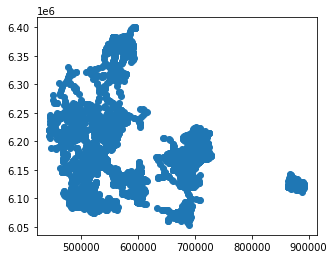

In [ ]:
stoejdata.plot()

In [ ]:
Show noise level on map. I interpret this like that the levels on big streets are bigger indicated by higher high noise lines between bigger cities.

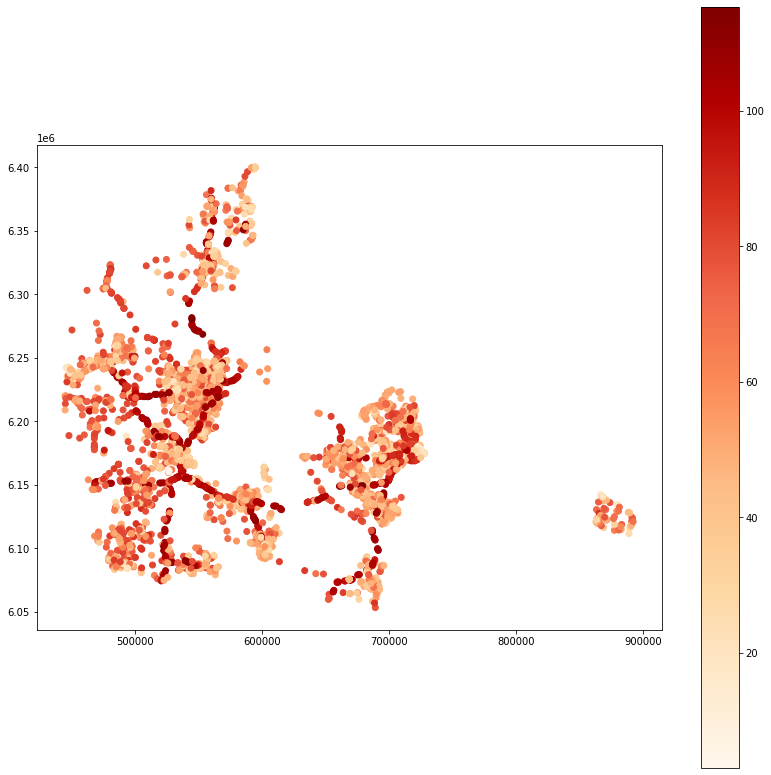

In [ ]:
stoejdata.plot(cmap='OrRd', column='GNSHAST071', figsize=(14,14), legend=True)

In [ ]:
Import Mental Health data:

In [ ]:
!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles.zip" # Downloads data files
!unzip shapefiles.zip # Unpacks data files

In [ ]:
municipalities = gdp.read_file("KOMMUNE.shp")
municipalities.head()

,FEAT_ID,FEAT_KODE,FEAT_TYPE,FEAT_STTXT,GEOM_STTXT,DAGI_ID,AREAL,REGIONKODE,REGIONNAVN,GYLDIG_FRA,GYLDIG_TIL,KOMKODE,KOMNAVN,DQ_SPECIFK,DQ_STATEM,DQ_DESCR,DQ_PROCESS,DQ_RESPONS,DQ_POSACPL,DQ_POSACLV,TIMEOF_CRE,TIMEOF_PUB,TIMEOF_REV,TIMEOF_EXP,geometry
0,149673,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,None,0350,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((675926.480 6172129.210 -999.000, 6..."
1,149674,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,None,0350,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((687523.890 6176458.950 -999.000, 6..."
2,149675,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,None,0350,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((689361.510 6173523.720 -999.000, 6..."
3,149676,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,None,0350,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((689210.210 6174589.210 -999.000, 6..."
4,149647,6310,Kommune,vedtaget,endelig,389130,25096.56,1084,Region Hovedstaden,2018-01-22,None,0250,Frederikssund,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-01-22,2018-01-22,None,2020-11-07,"POLYGON Z ((679613.660 6187623.990 -999.000, 6..."


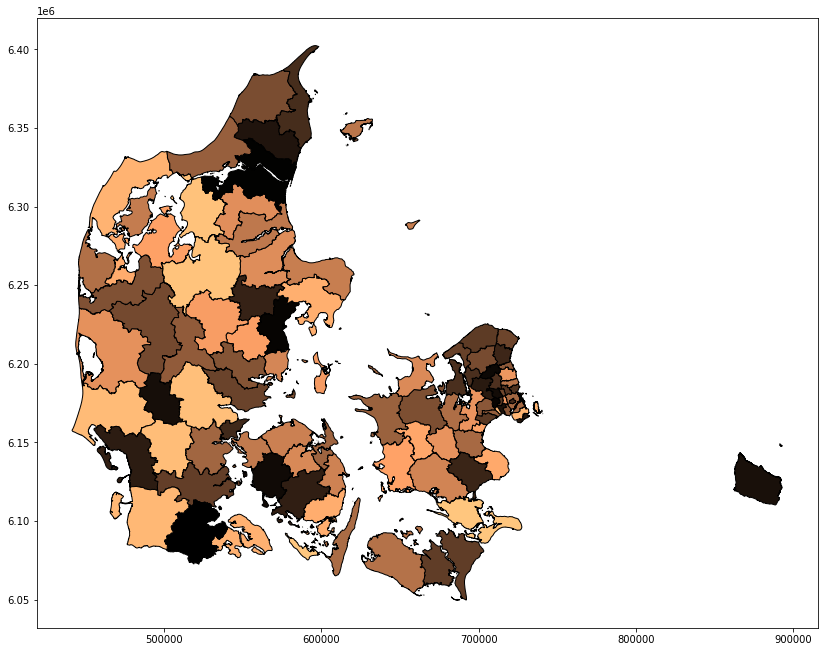

In [ ]:
municipalities.plot(cmap='copper', edgecolor='black', column='KOMNAVN', figsize=(14,14))

In [ ]:
municipalities.info(verbose=False)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Columns: 25 entries, FEAT_ID to geometry
dtypes: float64(1), geometry(1), int64(3), object(20)
memory usage: 307.7+ KB


In [ ]:
# Aggretating KomNavn
mun = municipalities.dissolve(by='KOMNAVN')

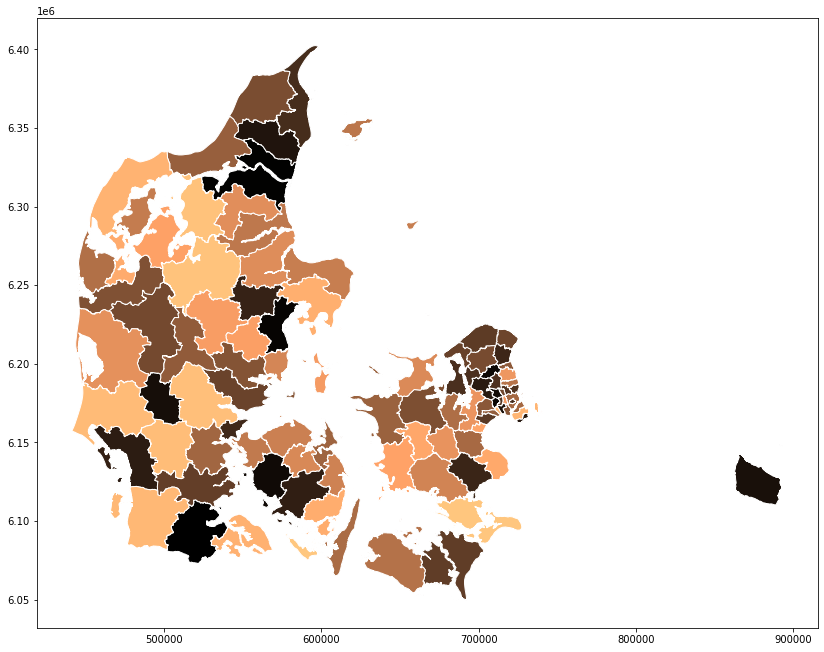

In [ ]:
mun.plot( cmap='copper', edgecolor='white', figsize=(14,14))

In [ ]:
# Mental Health Map
mun_data=pd.read_excel("https://github.com/CALDISS-AAU/sdsphd20/raw/master/datasets/spatialdata.xlsx")
mun_data.head()

,omr,alt2016,psyk2016,psykratio
0,København,64735,1326,0.020484
1,Frederiksberg,12364,258,0.020867
2,Dragør,1746,54,0.030928
3,Tårnby,5614,158,0.028144
4,Albertslund,3686,76,0.020619


In [ ]:
#Joining mental data
mun_fun = mun.merge(mun_data, left_on='KOMNAVN', right_on="omr", how='left', validate="one_to_one")
mun_fun.head()

,geometry,FEAT_ID,FEAT_KODE,FEAT_TYPE,FEAT_STTXT,GEOM_STTXT,DAGI_ID,AREAL,REGIONKODE,REGIONNAVN,GYLDIG_FRA,GYLDIG_TIL,KOMKODE,DQ_SPECIFK,DQ_STATEM,DQ_DESCR,DQ_PROCESS,DQ_RESPONS,DQ_POSACPL,DQ_POSACLV,TIMEOF_CRE,TIMEOF_PUB,TIMEOF_REV,TIMEOF_EXP,omr,alt2016,psyk2016,psykratio
0,MULTIPOLYGON Z (((532611.300 6079233.260 -999....,91071,6310,Kommune,vedtaget,endelig,389169,94061.45,1083,Region Syddanmark,2020-06-09,None,0580,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2020-06-09,2020-06-09,None,2020-11-07,Aabenraa,7016.0,109.0,0.015536
1,MULTIPOLYGON Z (((577131.740 6306752.540 -999....,149920,6310,Kommune,vedtaget,endelig,389206,113800.07,1081,Region Nordjylland,2018-11-07,None,0851,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-11-07,2018-11-07,None,2020-11-07,Aalborg,18343.0,340.0,0.018536
2,MULTIPOLYGON Z (((580132.510 6230146.780 -999....,150803,6310,Kommune,vedtaget,endelig,389194,47115.23,1082,Region Midtjylland,2018-06-28,None,0751,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-06-28,2018-06-28,None,2020-11-07,Aarhus,28614.0,472.0,0.016495
3,"POLYGON Z ((711377.280 6178342.550 -999.000, 7...",108994,6310,Kommune,vedtaget,endelig,389112,2343.66,1084,Region Hovedstaden,2020-08-27,None,0165,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2020-08-27,2020-08-27,None,2020-11-07,Albertslund,3686.0,76.0,0.020619
4,"POLYGON Z ((701094.650 6192181.200 -999.000, 7...",151461,6310,Kommune,vedtaget,endelig,389121,6742.52,1084,Region Hovedstaden,2018-01-22,None,0201,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-01-22,2018-01-22,None,2020-11-07,Allerød,2902.0,27.0,0.009304


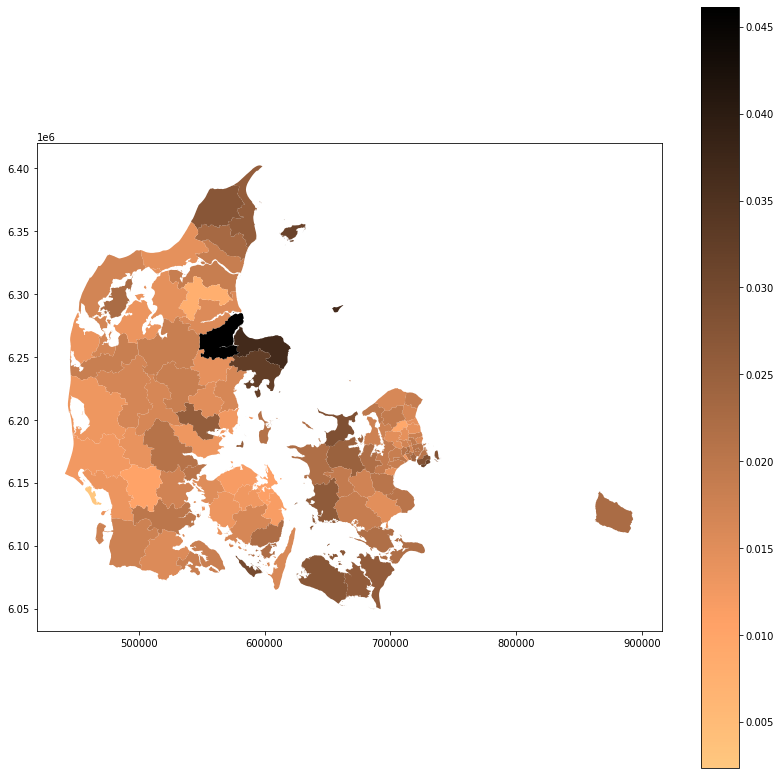

In [ ]:
mun_fun.plot(column="psykratio", legend="True", figsize=(14,14), cmap='copper_r')

The following map shows in Noise level as dots in red and the mental health areas together in one map.

Text(0.5, 1.0, 'Denmark mental illness (areas) and noise levels measurements(dots)')

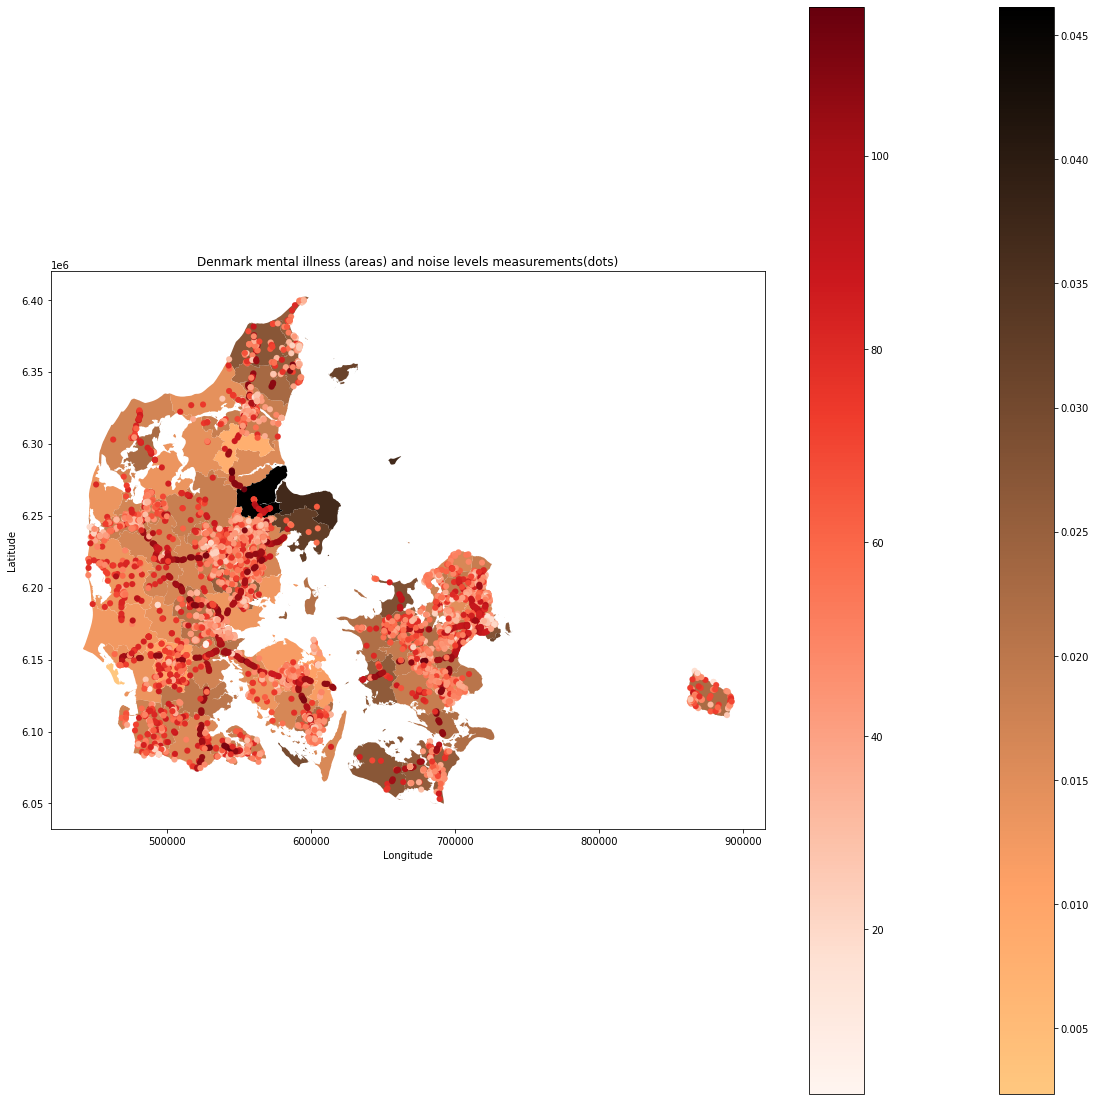

In [ ]:
fig, ax =plt.subplots(1,1, figsize=(20,20))
plt.title('Text1')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
mun_fun.plot(column="psykratio", ax=ax, legend=True, label='Ratio of pshychiatric hospitalizations', cmap='copper_r')
stoejdata.plot(ax=ax, label="Noise", linewidth =  0.1, cmap="Reds",column='GNSHAST071', legend=True)
plt.title('Denmark mental illness (areas) and noise levels measurements(dots)')

In [ ]:
# Calculate the average noise levels per Kommune
noise_mean =(stoejdata.groupby('KOMMUNE').mean('GNSHAST071').GNSHAST071).reset_index()

In [ ]:
noise_mean

,KOMMUNE,GNSHAST071
0,0.0,72.907692
1,101.0,31.097826
2,147.0,30.845000
3,151.0,72.583333
4,153.0,92.830769
...,...,...
92,846.0,108.113333
93,849.0,67.772727
94,851.0,51.842678
95,860.0,67.390741


In [ ]:
#make KomKode to float, otherwise joining not possible
mun['KOMKODE'] = mun['KOMKODE'].astype('float')

In [ ]:
#Joining 
mun = pd.merge(mun, noise_mean, left_on='KOMKODE', right_on='KOMMUNE', how='outer')

In [ ]:
print(mun.columns)

Index(['geometry', 'FEAT_ID', 'FEAT_KODE', 'FEAT_TYPE', 'FEAT_STTXT',
       'GEOM_STTXT', 'DAGI_ID', 'AREAL', 'REGIONKODE', 'REGIONNAVN',
       'GYLDIG_FRA', 'GYLDIG_TIL', 'KOMKODE', 'DQ_SPECIFK', 'DQ_STATEM',
       'DQ_DESCR', 'DQ_PROCESS', 'DQ_RESPONS', 'DQ_POSACPL', 'DQ_POSACLV',
       'TIMEOF_CRE', 'TIMEOF_PUB', 'TIMEOF_REV', 'TIMEOF_EXP', 'KOMMUNE',
       'GNSHAST071'],
      dtype='object')


In [ ]:
# the amount of Komkode and Kommune between both tables are not equal, showing a few NaNs
mun.loc[:,['GNSHAST071','KOMKODE']]

,GNSHAST071,KOMKODE
0,80.434694,580.0
1,51.842678,851.0
2,87.732143,751.0
3,49.565957,165.0
4,44.873134,201.0
...,...,...
102,83.600000,NaN
103,NaN,NaN
104,52.500000,NaN
105,77.000000,NaN


In [ ]:
print(noise_mean.columns)

Index(['KOMMUNE', 'GNSHAST071'], dtype='object')


In [ ]:
noise_mean

,KOMMUNE,GNSHAST071
0,0.0,72.907692
1,101.0,31.097826
2,147.0,30.845000
3,151.0,72.583333
4,153.0,92.830769
...,...,...
92,846.0,108.113333
93,849.0,67.772727
94,851.0,51.842678
95,860.0,67.390741


Show the mean GNSHAST017 values for each Kommune/Komkode:

Text(0.5, 1.0, 'Denmark noise levels')

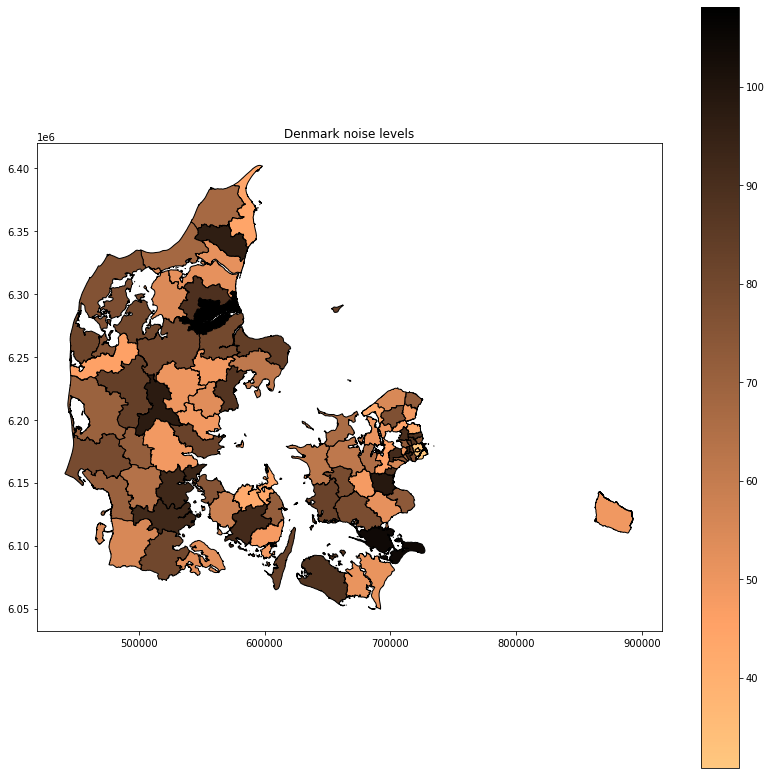

In [ ]:
mun.plot(cmap='copper_r', edgecolor='black', column='GNSHAST071', figsize=(14,14),legend="True")
plt.title('Denmark noise levels')

Text(0.5, 1.0, 'Denmark mental illness levels')

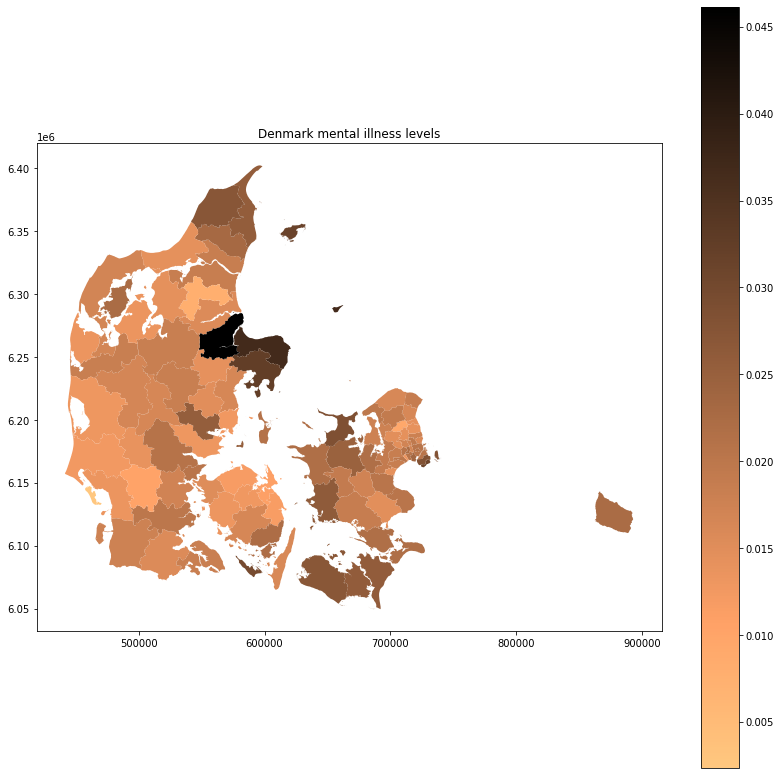

In [ ]:
mun_fun.plot(column="psykratio", legend="True", figsize=(14,14), cmap='copper_r')
plt.title('Denmark mental illness levels')

Visually comparing both pictures, there might be a correlation between mental illness and noise, best visible through the high level in the middle between Aarhus and Aalborg. This dont look however true for Kopenhagen. As a visualization this might trigger further investigations.